In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [24]:
df = pd.read_csv('Datasets\deptos_limpios.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26189 entries, 0 to 26188
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    26189 non-null  int64  
 1   monto                 26189 non-null  int64  
 2   superficie_t          26189 non-null  float64
 3   dormitorios           26189 non-null  int64  
 4   dormitorios_faltante  26189 non-null  int64  
 5   banos                 26189 non-null  int64  
 6   banos_faltante        26189 non-null  int64  
 7   antiguedad            26189 non-null  int64  
 8   antiguedad_faltante   26189 non-null  int64  
 9   Or_N                  26189 non-null  int64  
 10  Or_S                  26189 non-null  int64  
 11  Or_E                  26189 non-null  int64  
 12  Or_O                  26189 non-null  int64  
 13  Or_Faltante           26189 non-null  int64  
 14  terraza               26189 non-null  float64
 15  estacionamiento    

In [4]:
df.describe()

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud
count,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00,26189.00
mean,2246794806.93,7487.09,133.82,2.31,0.03,1.97,0.09,12.07,0.22,0.24,0.22,0.15,0.33,0.35,17.49,0.86,0.54,0.91,0.02,0.04,0.01,0.01,0.01,-33.44,-70.62
std,627729836.95,8980.19,1921.43,1.04,0.16,1.02,0.28,12.54,0.41,0.43,0.41,0.36,0.47,0.48,220.81,1.03,0.55,0.28,0.12,0.20,0.11,0.10,0.07,0.04,0.05
min,1359204515.00,15.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,-33.65,-70.83
25%,1580479353.00,2331.00,44.00,2.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.46,-70.65
50%,2751877688.00,3920.00,65.00,2.00,0.00,2.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.44,-70.62
75%,2850889636.00,8600.00,115.00,3.00,0.00,2.00,0.00,15.00,0.00,0.00,0.00,0.00,1.00,1.00,10.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.42,-70.58
max,2864912270.00,120000.00,292675.00,8.00,1.00,10.00,1.00,209.00,1.00,1.00,1.00,1.00,1.00,1.00,32543.00,10.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,-33.28,-70.49


In [29]:
df.sample(10)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
16408,2739409216,14900,197.00,3,0,2,0,29,0,0,0,0,1,0,23.00,2,1,1,0,0,0,0,0,-33.40,-70.58,Vitacura,Fátima
11146,2860707622,7190,90.20,2,0,2,0,5,0,0,1,0,0,0,15.39,1,1,1,0,0,0,0,0,-33.46,-70.59,Ñuñoa,Ottawa
25888,1541769581,4990,101.00,4,0,2,0,15,0,1,0,0,1,0,3.16,1,0,1,0,0,0,0,0,-33.42,-70.64,Recoleta,Avenida Perú
15660,1555045251,7800,108.00,2,0,2,0,8,0,0,1,0,0,0,21.00,0,0,1,0,0,0,0,0,-33.30,-70.69,Colina,Santa Valentina
1428,1551428019,1400,28.00,1,0,1,0,9,1,0,0,0,1,0,3.00,0,0,0,0,1,0,0,0,-33.45,-70.71,Estación Central,Avenida María Rozas Velásquez
23315,2848661644,6200,75.00,2,0,2,0,0,0,1,0,0,0,0,0.00,1,1,0,0,1,0,0,0,-33.45,-70.60,Ñuñoa,Avenida Simón Bolívar
2339,1589079959,2100,32.00,1,0,1,0,9,1,0,0,0,0,1,2.00,0,0,1,0,0,0,0,0,-33.50,-70.65,San Miguel,San Nicolás
6011,2859577672,2606,34.00,1,0,1,0,0,0,0,0,0,0,1,0.00,1,1,1,0,0,0,0,0,-33.44,-70.64,Santiago,Avenida Portugal
23216,2737489926,2155,55.00,2,0,2,0,9,0,0,1,1,0,0,4.00,0,1,1,0,0,0,0,0,-33.41,-70.66,Independencia,Avenida Inglaterra
24366,2864172772,2590,55.00,2,0,1,0,8,0,0,0,0,0,1,0.00,1,0,1,0,0,0,0,0,-33.52,-70.58,La Florida,Avenida Walker Martínez


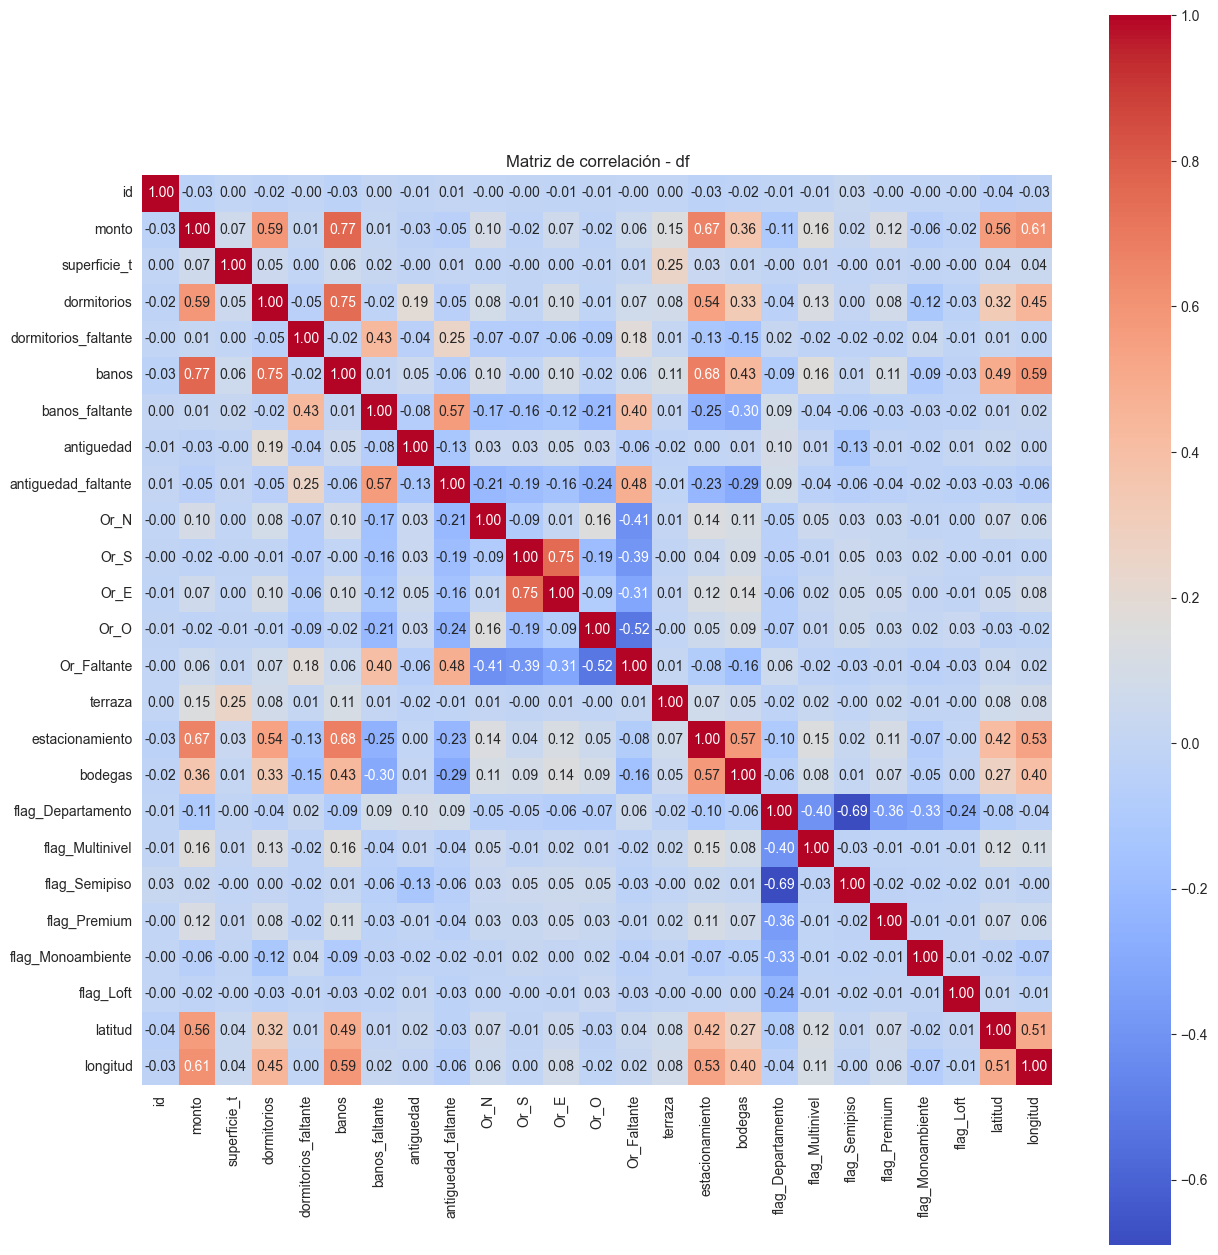

In [30]:
# Crear matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

# Graficar la matriz de correlación
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación - df")
plt.tight_layout()
plt.show()

Ojo con superficie_t, no tienen sentido varios de sus valores.

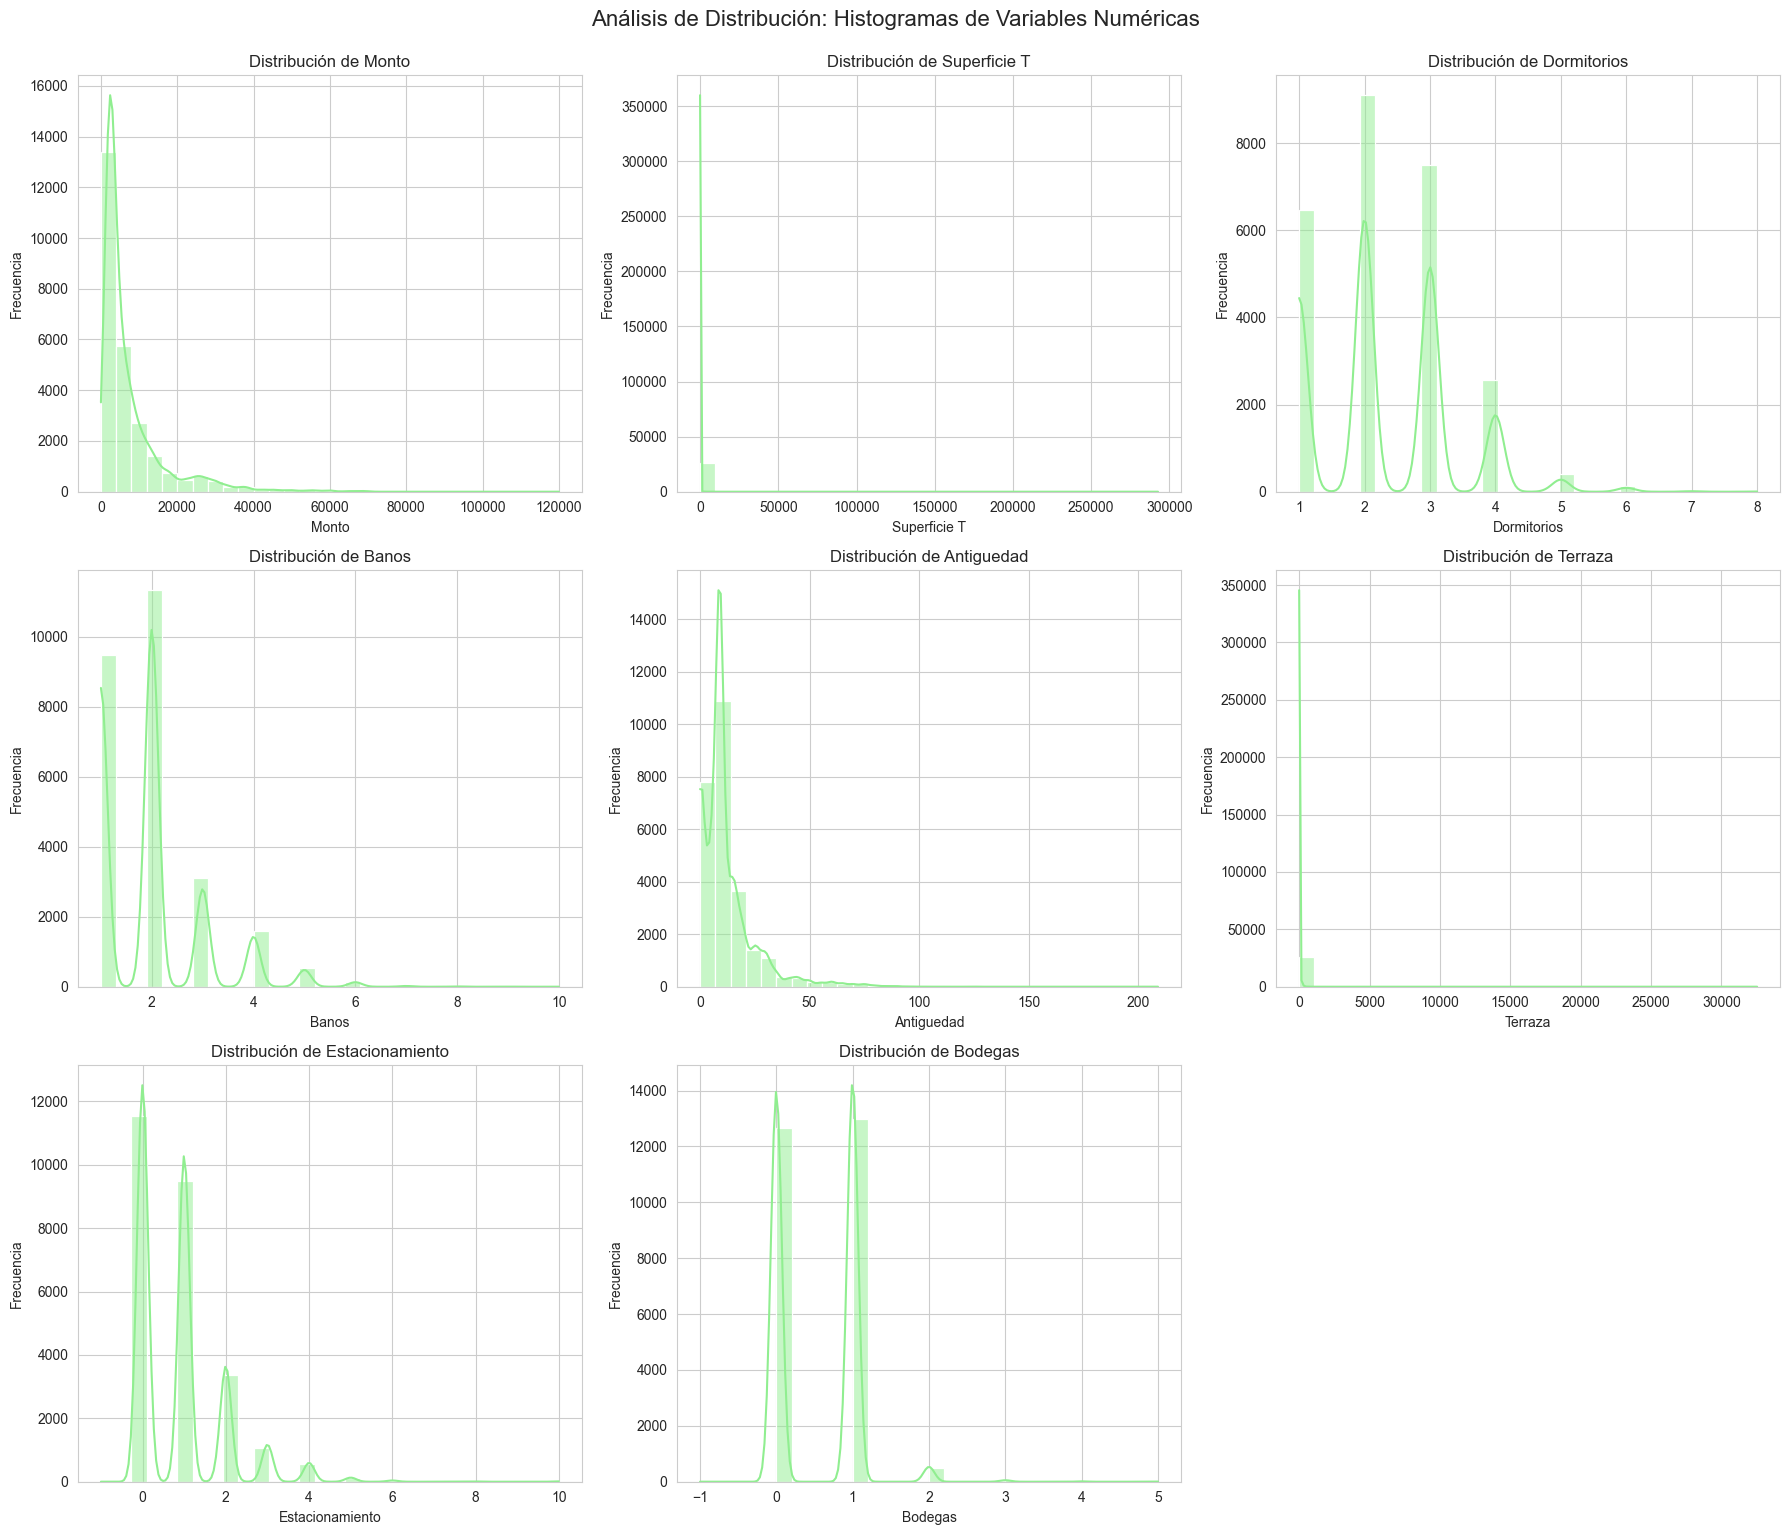

In [31]:
# Variables numéricas clave a visualizar
numeric_cols = ['monto', 'superficie_t', 'dormitorios', 'banos', 'antiguedad', 'terraza', 'estacionamiento', 'bodegas']

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y un conjunto de subplots para los histogramas
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula las filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Ajusta el tamaño de la figura
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

# Generar histplots para cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='lightgreen', bins=30)
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frecuencia')

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.suptitle('Análisis de Distribución: Histogramas de Variables Numéricas', y=1.02, fontsize=16) # Título general
plt.show()

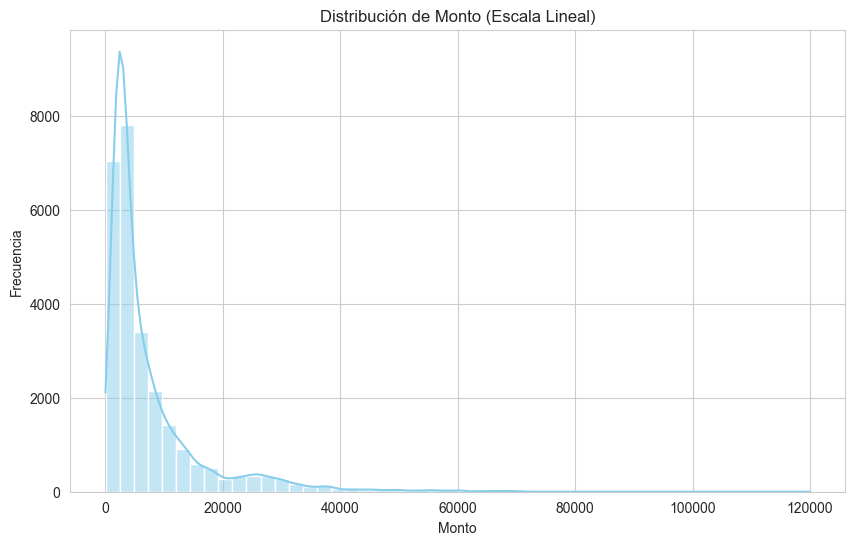

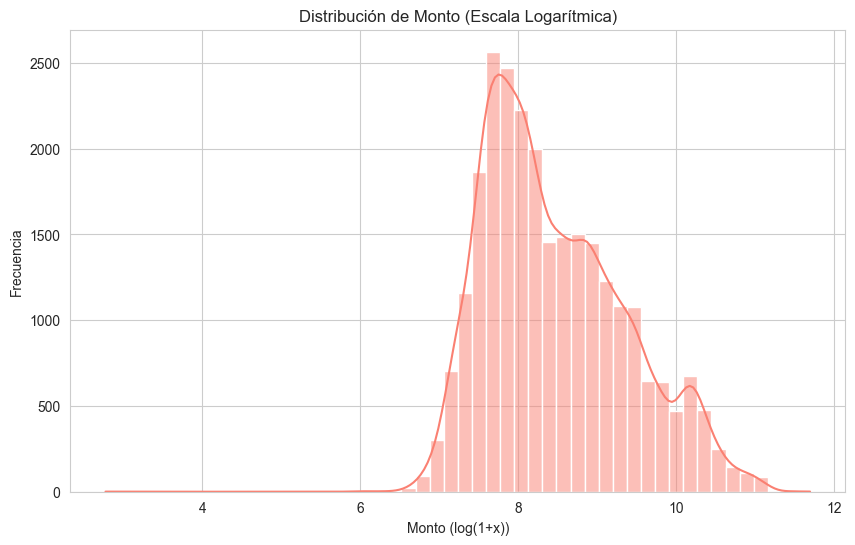

In [32]:
# Histograma de Monto (Escala Lineal)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='monto', kde=True, color='skyblue', bins=50)
plt.title('Distribución de Monto (Escala Lineal)')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain', axis='x') # Evita notación científica en el eje X para monto
plt.show()

# Histograma de Monto (Escala Logarítmica)
plt.figure(figsize=(10, 6))
# Usamos np.log1p (log(1+x)) para manejar valores de 0 si los hubiera, aunque para monto no es común.
# Si todos los montos son positivos, np.log(df['monto']) también funcionaría.
sns.histplot(data=df, x=np.log1p(df['monto']), kde=True, color='salmon', bins=50)
plt.title('Distribución de Monto (Escala Logarítmica)')
plt.xlabel('Monto (log(1+x))')
plt.ylabel('Frecuencia')
plt.show()

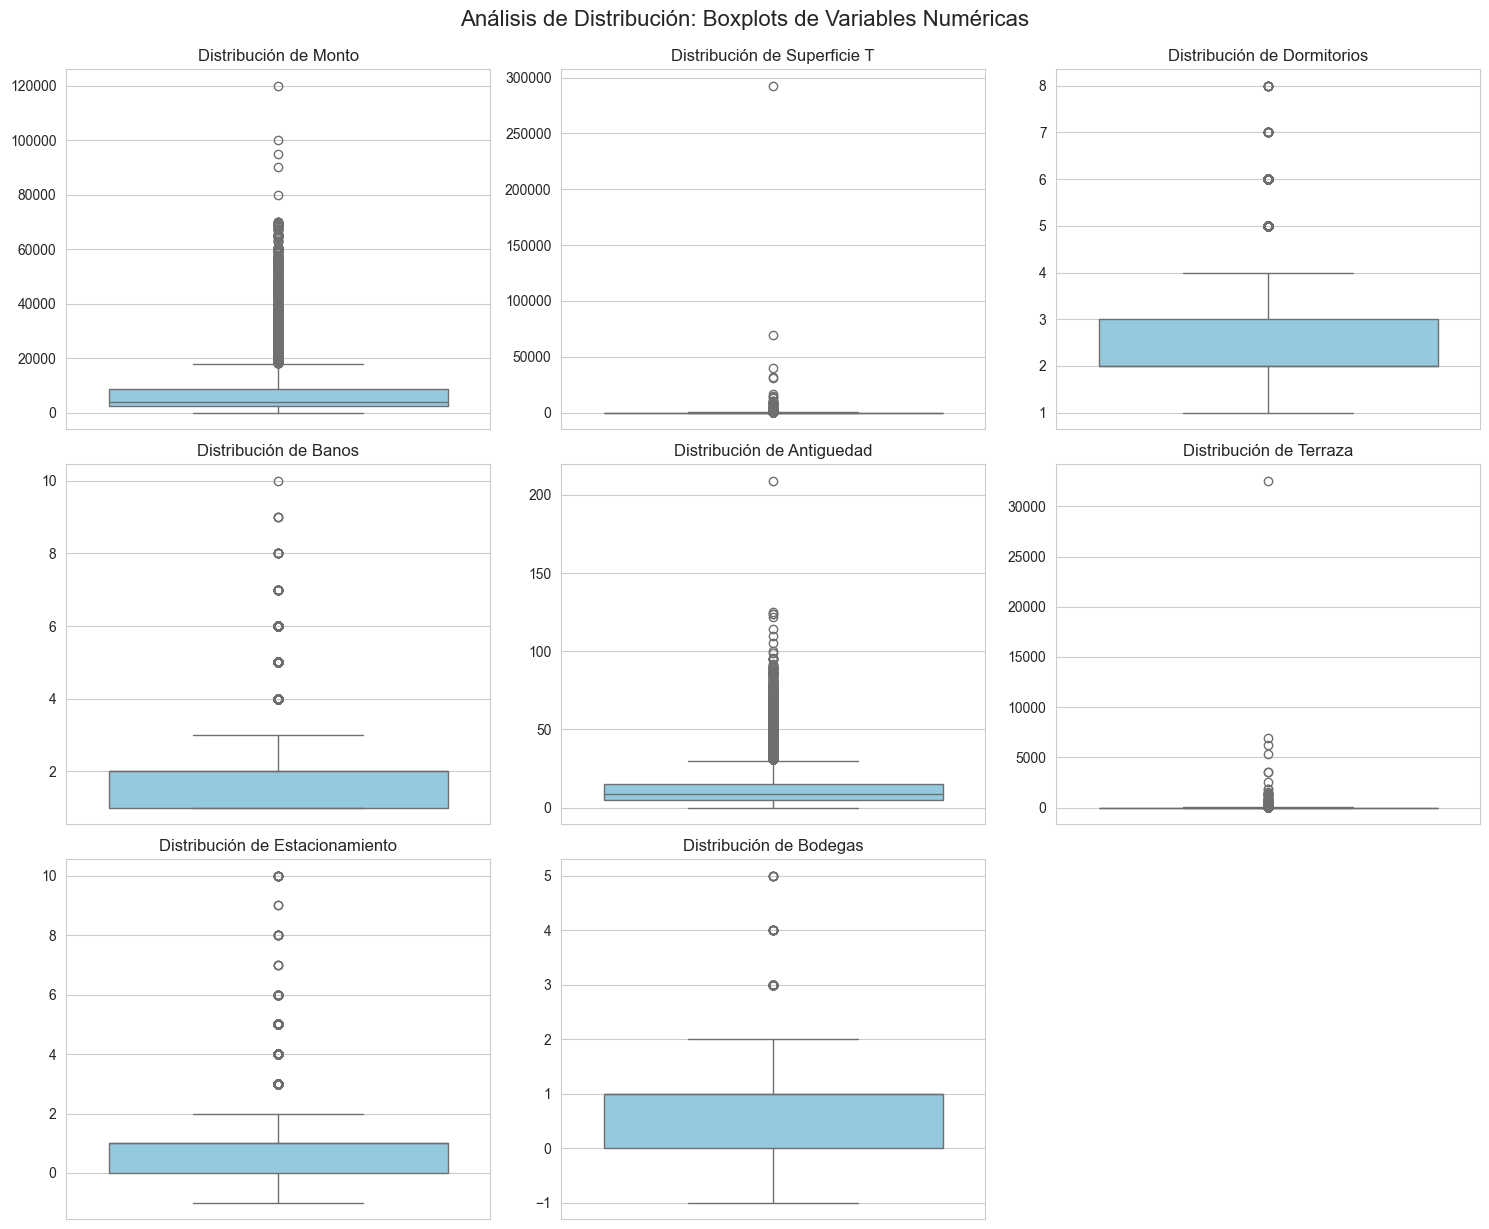

In [33]:
# Variables numéricas clave a visualizar
numeric_cols = ['monto', 'superficie_t', 'dormitorios', 'banos', 'antiguedad', 'terraza', 'estacionamiento', 'bodegas']

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y un conjunto de subplots
# Calculamos el número de filas y columnas necesarias.
# Por ejemplo, 3 columnas por fila parece una buena distribución.
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula las filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Ajusta el tamaño de la figura
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

# Generar boxplots para cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_ylabel('') # Eliminar la etiqueta del eje y para evitar redundancia

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.suptitle('Análisis de Distribución: Boxplots de Variables Numéricas', y=1.02, fontsize=16) # Título general
plt.show()


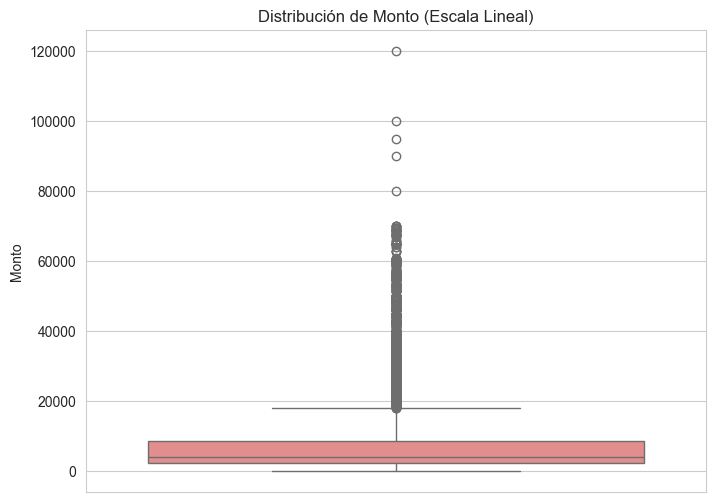

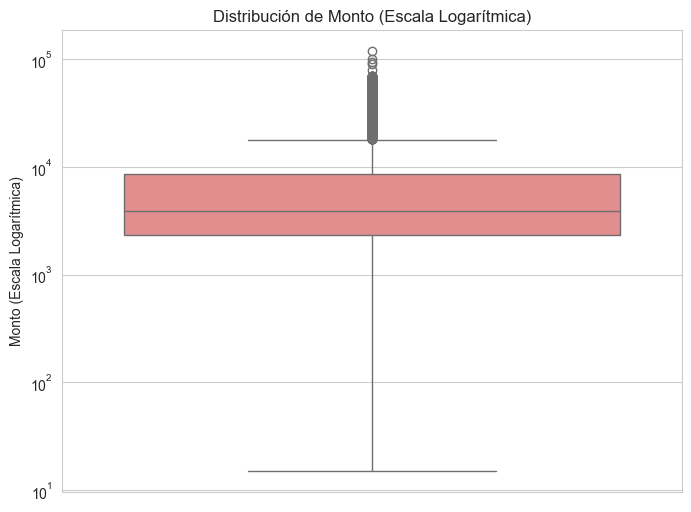

In [34]:
# --- Boxplot para Monto individualmente con escala logarítmica (opcional) ---
# Dada la alta variabilidad esperada en 'monto', un boxplot con escala logarítmica
# puede ser más informativo para visualizar su distribución y outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['monto'], color='lightcoral')
plt.title('Distribución de Monto (Escala Lineal)')
plt.ylabel('Monto')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['monto'].apply(lambda x: x if x > 0 else 1), color='lightcoral') # Evitar log(0)
plt.yscale('log')
plt.title('Distribución de Monto (Escala Logarítmica)')
plt.ylabel('Monto (Escala Logarítmica)')
plt.show()

#### Volveremos a analizar monto más adelante

### Revisamos la variable superficie

In [35]:
df_sorted_by_superficie = df.sort_values(by='superficie_t', ascending=False)
df_sorted_by_superficie.head(70)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
169,2794914580,15908,292675.00,3,0,2,1,9,1,0,0,0,0,1,0.00,0,0,1,0,0,0,0,0,-33.39,-70.58,Vitacura,Nueva Querétaro
3624,2861893124,40500,69718.00,5,0,5,0,0,0,0,0,0,0,1,32543.00,0,1,1,0,0,0,0,0,-33.37,-70.55,Vitacura,Vía Aurora
4415,1572081245,1281,40000.00,1,0,10,0,9,1,1,1,1,1,0,0.00,0,0,1,0,0,0,0,0,-33.45,-70.67,Santiago,Gorbea
4181,2739422928,26500,32230.00,2,1,2,1,9,1,0,0,0,0,1,6270.00,0,0,1,0,0,0,0,0,-33.37,-70.52,Vitacura,Avenida Club De Campo
24883,1591466453,23500,30795.00,6,0,2,1,9,1,0,0,0,0,1,2588.00,0,0,1,0,0,0,0,0,-33.41,-70.60,Las Condes,Isidora Goyenechea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446,1592056487,65000,1157.00,4,0,6,0,4,0,1,0,0,0,0,722.00,4,1,1,0,0,0,0,0,-33.38,-70.52,Las Condes,Paul Harris
3782,1589049495,35999,1148.00,4,0,6,0,17,0,0,1,1,0,0,623.00,4,2,0,1,0,0,0,0,-33.37,-70.55,Vitacura,Vía Aurora
14905,1568486461,9900,1025.00,3,0,3,0,0,0,0,0,0,0,1,0.00,1,1,1,0,0,0,0,0,-33.39,-70.57,Vitacura,Las Hualtatas
3767,1580865793,36000,1000.00,4,0,3,0,14,0,1,0,0,1,0,0.00,3,1,1,0,0,0,0,0,-33.37,-70.54,Vitacura,Raimundo Larraín


In [68]:
df_sorted_by_superficie = df.sort_values(by='superficie_t', ascending=True)
df_sorted_by_superficie.head(70)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
9680,1572578041,5250,1.00,3,0,2,0,9,1,0,0,0,0,1,0.00,0,0,1,0,0,0,0,0,-33.46,-70.62,Ñuñoa,Avenida José Domingo Cañas
19517,2833440116,973,1.00,2,0,1,0,9,1,0,0,0,0,1,0.00,0,0,1,0,0,0,0,0,-33.63,-70.62,Puente Alto,Calle Queilén
19507,2842067700,897,1.00,2,0,1,0,9,1,0,0,0,0,1,0.00,1,0,1,0,0,0,0,0,-33.58,-70.67,San Bernardo,Avenida Lo Blanco
731,1591841155,2790,1.00,1,0,1,0,3,0,0,0,0,1,0,1.00,0,1,1,0,0,0,0,0,-33.45,-70.64,Santiago,Avenida Portugal
19502,1569225943,897,1.00,2,0,1,0,9,1,0,0,0,0,1,0.00,0,0,1,0,0,0,0,0,-33.59,-70.61,La Pintana,La Primavera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14797,1541644405,7090,13.00,1,0,1,0,4,0,1,0,0,0,0,56.00,1,1,1,0,0,0,0,0,-33.44,-70.61,Providencia,Enrique Del Piano
10939,2841100730,7332,13.95,2,0,2,1,9,1,0,0,0,0,1,83.74,0,0,1,0,0,0,0,0,-33.45,-70.59,Ñuñoa,García Moreno
4556,2755224832,2000,14.00,1,0,1,0,9,1,0,0,0,1,0,0.00,0,0,1,0,0,0,0,0,-33.45,-70.65,Santiago,Eleuterio Ramírez
7177,1591778007,9500,15.00,3,0,3,0,9,1,0,1,1,0,0,0.00,2,1,1,0,0,0,0,0,-33.42,-70.57,Las Condes,Martín Alonso Pinzón


In [69]:
# Establecer los umbrales razonables para la superficie_t
umbral_max_superficie_para_modelo = 400 # metros cuadrados
umbral_min_superficie = 15 # metros cuadrados

# Filtrar el DataFrame original para la superficie total, aplicando ambos umbrales
# Esto creará tu DataFrame df2 con los filtros de superficie aplicados
df2 = df[
    (df['superficie_t'] <= umbral_max_superficie_para_modelo) &
    (df['superficie_t'] >= umbral_min_superficie)
].copy()

print(f"Número total de departamentos original: {len(df)}")
print(f"Departamentos después de filtrar por superficie_t (entre {umbral_min_superficie}m² y {umbral_max_superficie_para_modelo}m²): {len(df2)}")
print(f"Departamentos eliminados por superficie_t: {len(df) - len(df2)}")

Número total de departamentos original: 26189
Departamentos después de filtrar por superficie_t (entre 15m² y 400m²): 25234
Departamentos eliminados por superficie_t: 955


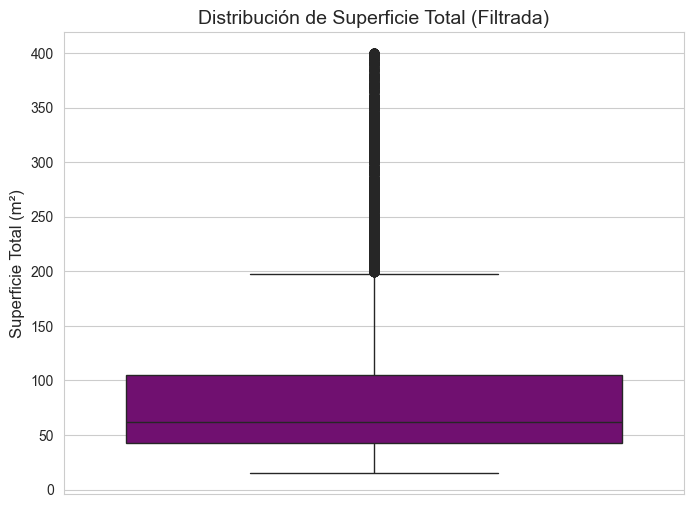

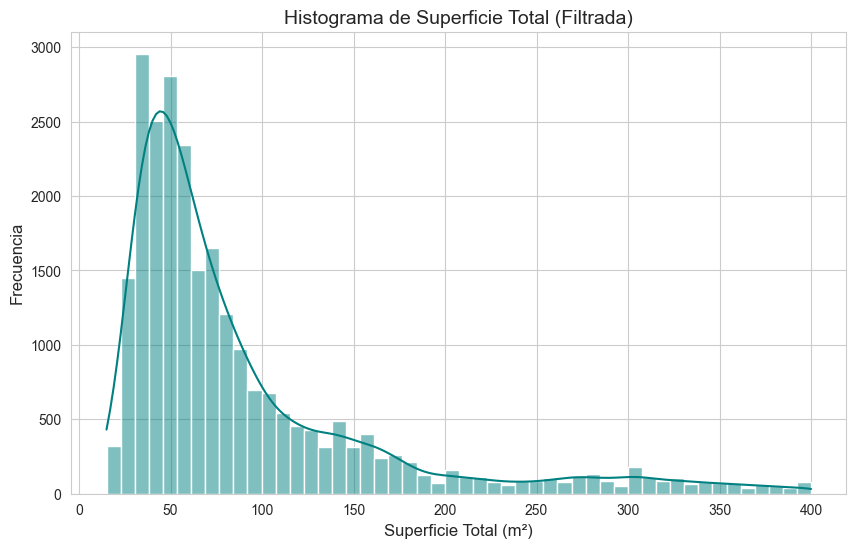

In [70]:
sns.set_style("whitegrid")

# --- Boxplot para superficie_t ---
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['superficie_t'], color='purple')
plt.title('Distribución de Superficie Total (Filtrada)', fontsize=14)
plt.ylabel('Superficie Total (m²)', fontsize=12)
plt.show()

# --- Histograma para superficie_t ---
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='superficie_t', kde=True, color='teal', bins=50)
plt.title('Histograma de Superficie Total (Filtrada)', fontsize=14)
plt.xlabel('Superficie Total (m²)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

### Justificación de la Eliminación de Outliers en superficie_t
La decisión de eliminar departamentos con superficies totales extremadamente altas (superiores a 400 m²) se justifica por la necesidad de construir un modelo predictivo de precios robusto y preciso para el segmento de mercado más representativo. Si bien existen modelos avanzados capaces de capturar la relación entre la ubicación y las dimensiones atípicas sin comprometer significativamente la precisión general, la realidad de nuestros datos es que varios de estos casos anómalos corresponden a errores de ingreso. Por ejemplo, mientras un departamento de 1000 m² en una comuna exclusiva como Lo Barnechea (Lo Curro) podría ser una propiedad de lujo legítima, un valor similar en una comuna como Estación Central, con características urbanas muy distintas, es altamente improbable y sugiere un dato erróneo. La inclusión de estos valores atípicos, que constituyen un porcentaje mínimo del dataset pero poseen una variabilidad desproporcionada y a menudo incorrecta, podría sesgar el modelo, disminuyendo su capacidad para capturar los patrones de precios en la vasta mayoría de los departamentos válidos y representativos. Al concentrar el análisis en un rango de superficies más homogéneo y confiable, se mejora la eficiencia del modelo y su interpretabilidad, asegurando que las predicciones sean más confiables para el grueso de las transacciones.
Complementariamente, se aplicó un filtro inferior, eliminando registros con superficies menores a 15 m², dado que tales dimensiones son inviables para un departamento habitable y son claramente resultado de errores de digitación, consolidando así un rango de datos más realista para el modelado.

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25234 entries, 0 to 26188
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25234 non-null  int64  
 1   monto                 25234 non-null  int64  
 2   superficie_t          25234 non-null  float64
 3   dormitorios           25234 non-null  int64  
 4   dormitorios_faltante  25234 non-null  int64  
 5   banos                 25234 non-null  int64  
 6   banos_faltante        25234 non-null  int64  
 7   antiguedad            25234 non-null  int64  
 8   antiguedad_faltante   25234 non-null  int64  
 9   Or_N                  25234 non-null  int64  
 10  Or_S                  25234 non-null  int64  
 11  Or_E                  25234 non-null  int64  
 12  Or_O                  25234 non-null  int64  
 13  Or_Faltante           25234 non-null  int64  
 14  terraza               25234 non-null  float64
 15  estacionamiento       25

In [72]:
df2.describe()

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud
count,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00,25234.00
mean,2248741018.39,6462.48,90.22,2.25,0.03,1.89,0.09,12.16,0.22,0.23,0.22,0.15,0.33,0.35,10.46,0.80,0.53,0.92,0.01,0.04,0.01,0.01,0.01,-33.44,-70.62
std,627643577.94,6652.35,74.79,0.99,0.16,0.91,0.28,12.62,0.41,0.42,0.41,0.36,0.47,0.48,37.51,0.92,0.54,0.28,0.12,0.20,0.10,0.10,0.08,0.04,0.05
min,1359204515.00,15.00,15.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-33.65,-70.83
25%,1580864663.50,2300.00,43.00,1.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.46,-70.65
50%,2753156586.00,3800.00,62.00,2.00,0.00,2.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.44,-70.63
75%,2850990263.00,7980.00,105.00,3.00,0.00,2.00,0.00,15.00,0.00,0.00,0.00,0.00,1.00,1.00,9.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.42,-70.58
max,2864912270.00,120000.00,400.00,8.00,1.00,8.00,1.00,209.00,1.00,1.00,1.00,1.00,1.00,1.00,3500.00,10.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,-33.28,-70.49


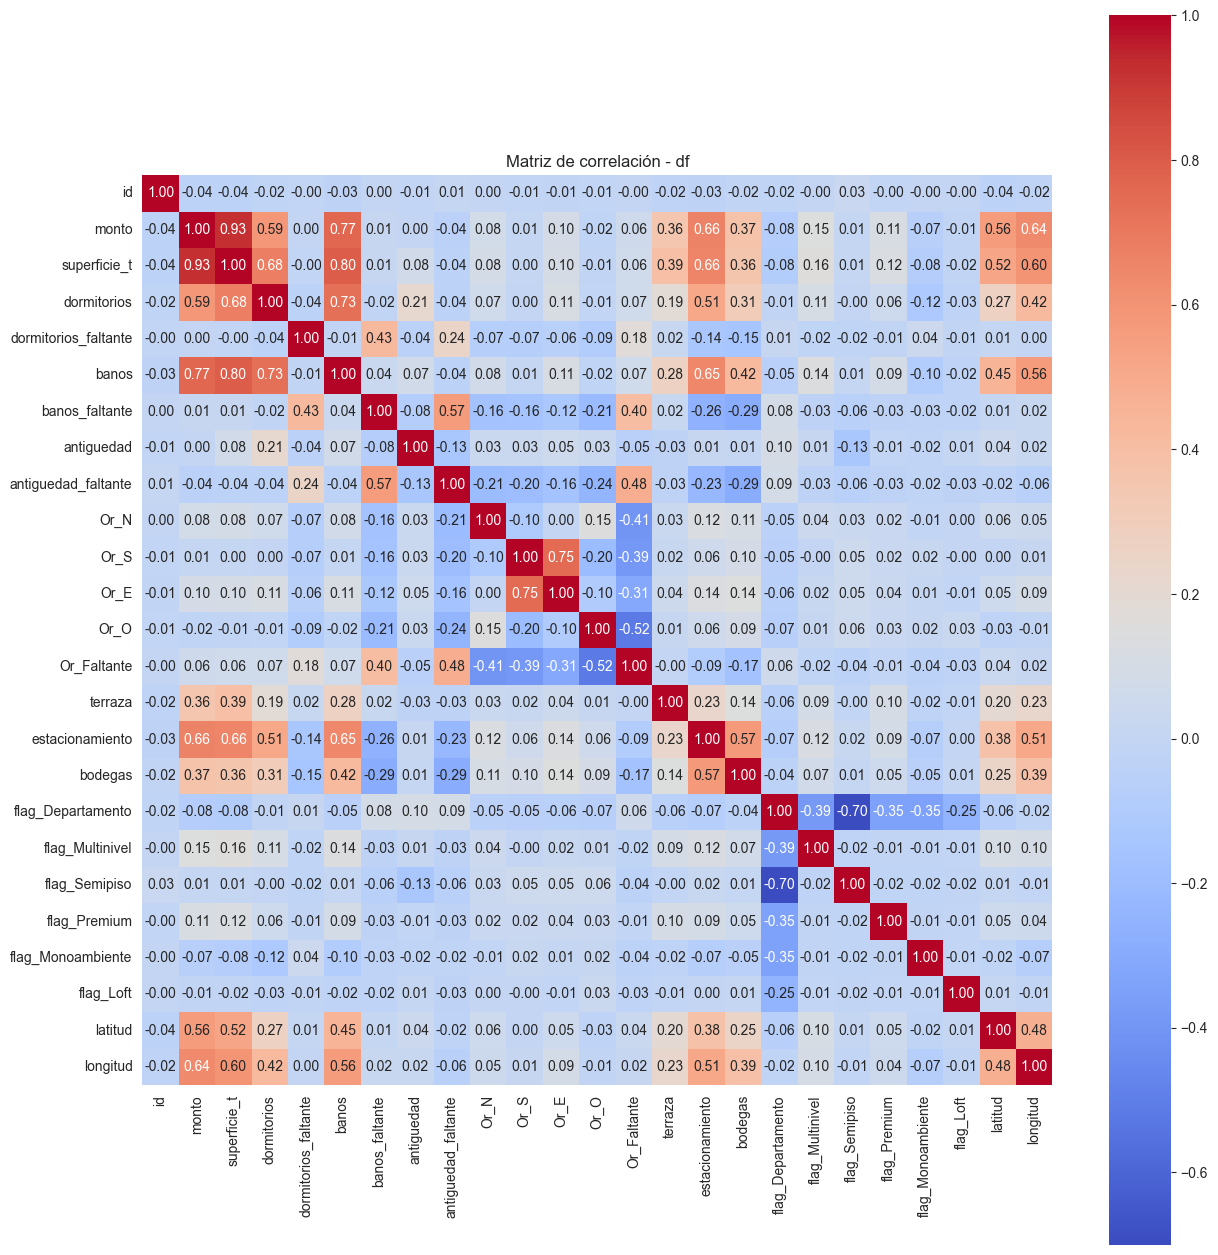

In [73]:
# Crear matriz de correlación
correlation_matrix = df2.corr(numeric_only=True)

# Graficar la matriz de correlación
plt.figure(figsize=(13, 13))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación - df")
plt.tight_layout()
plt.show()

### Impacto del Filtrado de Outliers en la Matriz de Correlación
La eliminación de departamentos con superficies útiles superiores a 400 m² ha generado un impacto profundo y altamente beneficioso en la matriz de correlación de nuestro dataset. Previo a este filtrado, la correlación entre monto y superficie_t era casi inexistente (0.07), lo cual resultaba anómalo dada la relación intrínseca entre tamaño y precio de una propiedad. Tras la limpieza, esta correlación se ha vuelto radicalmente fuerte y lógica (0.93), indicando que el precio ahora refleja de manera precisa y cuantitativa el tamaño del departamento. De manera similar, la correlación con terraza también se fortaleció significativamente, pasando de 0.15 a 0.39, sugiriendo que el tamaño de la terraza, en un rango más coherente de propiedades, tiene una relación más clara con el valor.

Estos cambios no se limitan solo a la relación con el monto. La variable superficie_t ahora exhibe correlaciones mucho más robustas con otras características clave del departamento. Observamos incrementos masivos en la correlación con dormitorios (de 0.05 a 0.68), banos (de 0.06 a 0.80), estacionamiento (de 0.03 a 0.66) y bodegas (de 0.01 a 0.36). Esto indica que, al eliminar datos erróneos y atípicos, las relaciones lógicas entre las dimensiones del departamento (superficie, número de habitaciones, servicios adicionales) y el precio se hacen evidentes. Incluso las correlaciones con las variables geográficas latitud (de 0.04 a 0.56) y longitud (de 0.04 a 0.64) mejoraron sustancialmente, lo que es un excelente indicio para el enfoque orientado a los aspectos georreferenciales. Estos valores sugieren que la ubicación de departamentos de tamaño más estándar está más coherentemente ligada a su precio.  

### Observaciones de la Matriz de Correlación Post-Filtrado
El análisis de la matriz de correlación del conjunto de datos, posterior al filtrado de valores atípicos en la superficie total, revela que la mayoría de las variables numéricas clave exhiben correlaciones lógicas y esperadas con el monto de la propiedad. Variables como superficie_t, dormitorios y baños muestran relaciones directas y significativas con el precio, lo cual es fundamental para el modelado predictivo. De manera similar, las coordenadas geográficas, latitud y longitud, también presentan correlaciones positivas con el monto, sugiriendo que la ubicación es un factor determinante en la valoración. Características adicionales como terraza (0.35), bodegas (0.36) y especialmente estacionamiento (0.66) demuestran una influencia considerable en el precio final, lo cual es consistente con las valoraciones del mercado inmobiliario.

No obstante, se observa una correlación prácticamente nula (0.00) entre antiguedad y monto, lo que contrasta con la expectativa general de que la antigüedad suele impactar el valor de una propiedad. La correlación más alta de antiguedad es con dormitorios (0.21), un valor aún modesto. Esta falta de correlación con el monto sugiere la necesidad de una exploración más profunda de la variable antiguedad, que podría incluir la identificación y tratamiento de valores atípicos, o la consideración de posibles relaciones no lineales. En cuanto a las variables de orientación, las correlaciones son leves pero intuitivamente coherentes: Norte (0.10) y Este (0.07) muestran una asociación positiva, mientras que Sur (-0.02) y Oeste (-0.02) presentan una relación marginalmente negativa, lo que se alinea con la preferencia de mercado por orientaciones que optimizan la iluminación y el confort térmico. Finalmente, las columnas flag para los tipos de departamento (Multinivel 0.15, Premium 0.11, Semipiso 0.01, Loft -0.01, Monoambiente -0.07) también reflejan patrones consistentes con las expectativas de valor, donde los tipos de mayor lujo o complejidad tienden a tener una correlación positiva más marcada.

### Volvemos a analizar la variable monto

In [41]:
df_sorted_by_monto = df2.sort_values(by='monto', ascending=False)
df_sorted_by_monto.head(5)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
19683,2737537832,120000,70.00,3,0,2,0,9,1,0,0,0,0,1,0.00,1,0,1,0,0,0,0,0,-33.49,-70.75,Maipú,Avenida Los Pajaritos
755,1555792131,90000,286.00,5,0,6,0,9,1,0,0,0,0,1,0.00,4,1,1,0,0,0,0,0,-33.34,-70.49,Lo Barnechea,Avenida Paseo Pie Andino
3434,1572716985,68400,375.00,4,0,5,0,0,0,1,1,1,1,0,115.00,4,1,1,0,0,0,0,0,-33.37,-70.53,Lo Barnechea,Avenida Santa Blanca
3445,1588252411,65000,1.00,4,0,5,0,15,0,1,0,0,0,0,0.00,4,0,1,0,0,0,0,0,-33.41,-70.60,Las Condes,Augusto Leguía Norte
3469,2813502808,59780,385.00,3,0,4,0,0,0,0,0,0,0,1,82.00,4,1,1,0,0,0,0,0,-33.38,-70.53,Las Condes,Paul Harris


In [74]:
df_sorted_by_monto = df2.sort_values(by='monto', ascending=True)
df_sorted_by_monto.head(20)

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud,comuna,calle
15821,1589933771,15,59.00,3,0,2,0,22,0,0,1,0,0,0,3.00,0,0,1,0,0,0,0,0,-33.39,-70.68,Conchalí,Avenida Independencia
9256,2824944372,24,83.00,2,0,2,0,14,0,1,0,0,1,0,12.00,1,1,1,0,0,0,0,0,-33.43,-70.58,Providencia,Avenida Alcalde Eliecer Parada Pacheco
11423,1589982361,384,37.94,1,0,1,0,9,1,0,0,0,0,1,4.62,0,0,1,0,0,0,0,0,-33.47,-70.62,Ñuñoa,San Eugenio
2851,1583765381,400,57.00,2,0,2,0,0,0,0,0,0,0,1,6.29,0,0,1,0,0,0,0,0,-33.52,-70.60,La Florida,Avenida Vicuña Mackenna Poniente
21531,2861030534,400,60.55,2,0,2,0,0,0,0,0,0,0,1,10.72,1,0,1,0,0,0,0,0,-33.46,-70.63,Santiago,Avenida Vicuña Mackenna
6759,2855453420,405,51.32,2,0,2,0,0,0,0,0,0,0,1,2.29,0,0,1,0,0,0,0,0,-33.43,-70.67,Santiago,Avenida Presidente Balmaceda
19478,2858929260,485,39.00,1,0,1,0,1,0,0,0,0,1,0,3.00,1,1,1,0,0,0,0,0,-33.47,-70.62,Ñuñoa,Francisco Meneses
2428,2856091896,520,46.50,2,0,1,0,0,0,0,0,0,1,0,0.00,1,0,1,0,0,0,0,0,-33.48,-70.65,San Miguel,San Ignacio De Loyola
19479,2792728652,528,99.00,3,0,2,0,1,0,0,0,0,0,1,6.50,1,1,1,0,0,0,0,0,-33.48,-70.60,Macul,Gregorio De La Fuente Rojas
4275,1582608985,591,64.20,3,0,2,0,0,0,0,0,0,0,1,5.90,1,1,1,0,0,0,0,0,-33.48,-70.58,Macul,Ramón Cruz Montt


In [75]:
# Lista de IDs a eliminar
ids_a_eliminar = [2737537832, 1588252411, 1589933771, 2824944372]

# Eliminar las filas con los IDs especificados
# Usamos .isin() para filtrar las filas cuyos IDs están en nuestra lista y luego negamos el filtro
df2 = df2[~df2['id'].isin(ids_a_eliminar)].copy()

print(f"Departamentos antes de eliminar los IDs específicos: {len(df2) + len(ids_a_eliminar)}")
print(f"Departamentos después de eliminar los IDs específicos: {len(df2)}")

Departamentos antes de eliminar los IDs específicos: 25235
Departamentos después de eliminar los IDs específicos: 25231


### Justificación de la Eliminación de Registros Específicos
Se procedió a la eliminación de dos registros específicos con IDs 2737537832 y 1588252411. El primero presentaba un valor de monto extremadamente alto e incongruente (120.000), sugiriendo un error de tipeo en las unidades monetarias. El segundo caso exhibía una superficie_t de 1.00 m² con un monto de 65.000, lo cual es físicamente inviable para un departamento. Ambos registros fueron identificados como errores claros de entrada de datos, cuya permanencia distorsionaría las relaciones estadísticas y la precisión del modelo predictivo. Por otro lado se eliminaron 1589933771, 2824944372 por tener valores irrealmente bajos. Esta acción asegura la coherencia y validez de los datos restantes para el análisis.

### Revisamos terraza que en el histplot del inicio notamos una asimetria exajerada y valores no realistas.

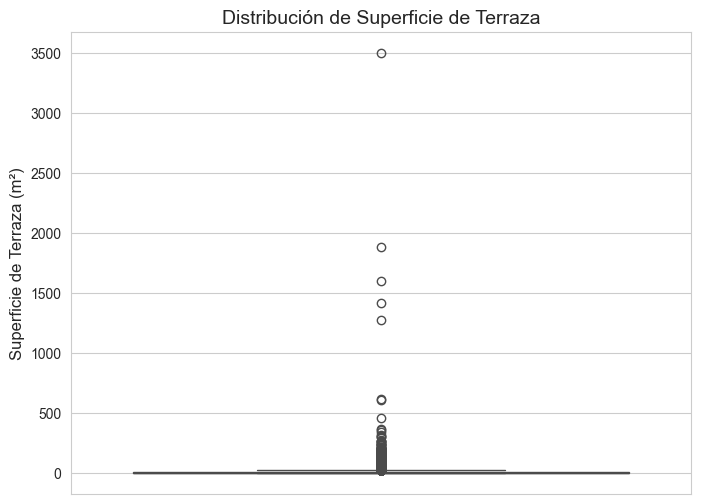

In [44]:
sns.set_style("whitegrid")

# --- Boxplot para terraza ---
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2['terraza'], color='goldenrod')
plt.title('Distribución de Superficie de Terraza', fontsize=14)
plt.ylabel('Superficie de Terraza (m²)', fontsize=12)
plt.show()

In [48]:
# Columnas de interés para el análisis
cols_to_display = ['id', 'monto', 'superficie_t', 'dormitorios', 'banos', 'terraza', 'comuna']

# Ordena el DataFrame por 'terraza' de forma descendente y selecciona las columnas de interés
df_sorted_by_terraza_subset = df2.sort_values(by='terraza', ascending=False)[cols_to_display]

# Muestra las 15 filas con las terrazas más grandes para un análisis más exhaustivo
df_sorted_by_terraza_subset.head(30)

,id,monto,superficie_t,dormitorios,banos,terraza,comuna
1862,1586649923,3250,60.00,2,2,3500.00,San Miguel
19973,1564344749,25100,327.10,2,4,1885.00,Las Condes
3167,2857333894,1332,28.00,2,2,1600.00,Independencia
16514,1584376759,4410,76.72,2,2,1414.00,Maipú
7463,1587847301,8540,103.00,2,2,1276.00,Las Condes
11942,2799892690,2946,67.00,2,2,615.00,Santiago
21067,2839710668,7975,79.78,2,2,607.00,Ñuñoa
9326,2857590598,4000,57.23,2,2,455.00,Ñuñoa
21499,1586779739,2809,29.12,2,2,368.00,Ñuñoa
3712,1577164641,37500,280.00,3,4,360.00,Providencia


In [77]:
# Define the list of allowed comunas for terraces > 200m²
comunas_permitidas_terraza_grande = ['Lo Barnechea', 'Vitacura', 'Las Condes', 'Peñalolen']

# Apply the first filter: remove any terrace > 500m² regardless of comuna
df_terraza = df2[df2['terraza'] <= 500].copy()

# Apply the second filter: remove terraces > 200m² if they are NOT in the allowed comunas
# We need to explicitly check if 'terraza' is > 200 AND 'comuna' is NOT in the allowed list
df_terraza = df_terraza[
    ~((df_terraza['terraza'] > 200) & (~df_terraza['comuna'].isin(comunas_permitidas_terraza_grande)))
].copy()


print(f"Departamentos antes de filtrar por terraza: {len(df2)}")
print(f"Departamentos después de filtrar por terraza: {len(df_terraza)}")
print(f"Departamentos eliminados en este paso: {len(df2) - len(df_terraza)}")

Departamentos antes de filtrar por terraza: 25231
Departamentos después de filtrar por terraza: 25216
Departamentos eliminados en este paso: 15


### Justificación de la Eliminación de Outliers en terraza
La operación de limpieza de la variable terraza se implementó mediante un criterio doble para refinar la calidad del dataset. Primeramente, se eliminaron de manera incondicional todos los registros con superficies de terraza superiores a 500 m², ya que valores tan extremos se consideran incongruentes con la naturaleza de un departamento y, por ende, muy probablemente corresponden a errores de ingreso de datos. Adicionalmente, y basándose en un conocimiento contextual del mercado inmobiliario de Santiago, se descartaron aquellos departamentos con terrazas superiores a 200 m² que no se encuentran en las comunas de Lo Barnechea, Vitacura, Las Condes o Peñalolén. Esta distinción reconoce que terrazas de gran envergadura son excepcionalmente raras fuera de estas zonas de alto valor y menor densidad, donde las propiedades de lujo pueden justificar tales dimensiones. Esta estrategia de filtrado aseguró la eliminación de solo 15 registros anómalos, lo que valida la precisión de los criterios y garantiza que el modelo predictivo se entrene con datos de terraza más realistas y representativos del mercado objetivo, mejorando su fiabilidad y capacidad de generalización.

### Revisamos algunos detalles como un valor negativo en estacionamiento.

In [78]:
filas_estacionamiento_negativo = df_terraza[df_terraza['estacionamiento'] == -1]
print(filas_estacionamiento_negativo)

               id  monto  superficie_t  dormitorios  dormitorios_faltante  \
26126  1578293925  14490        170.00            3                     0   

       banos  banos_faltante  antiguedad  antiguedad_faltante  Or_N  Or_S  \
26126      2               0           9                    0     1     0   

       Or_E  Or_O  Or_Faltante  terraza  estacionamiento  bodegas  \
26126     0     0            0    50.00               -1        1   

       flag_Departamento  flag_Multinivel  flag_Semipiso  flag_Premium  \
26126                  1                0              0             0   

       flag_Monoambiente  flag_Loft  latitud  longitud        comuna  \
26126                  0          0   -33.36    -70.52  Lo Barnechea   

                   calle  
26126  Avenida La Dehesa  


In [79]:
df_terraza = df_terraza[df_terraza['estacionamiento'] != -1].copy()

In [80]:
df3 = df_terraza.copy()

#### Volvemos a revisar la matriz de correlación, los histogramas y boxplots despues de estos cambios

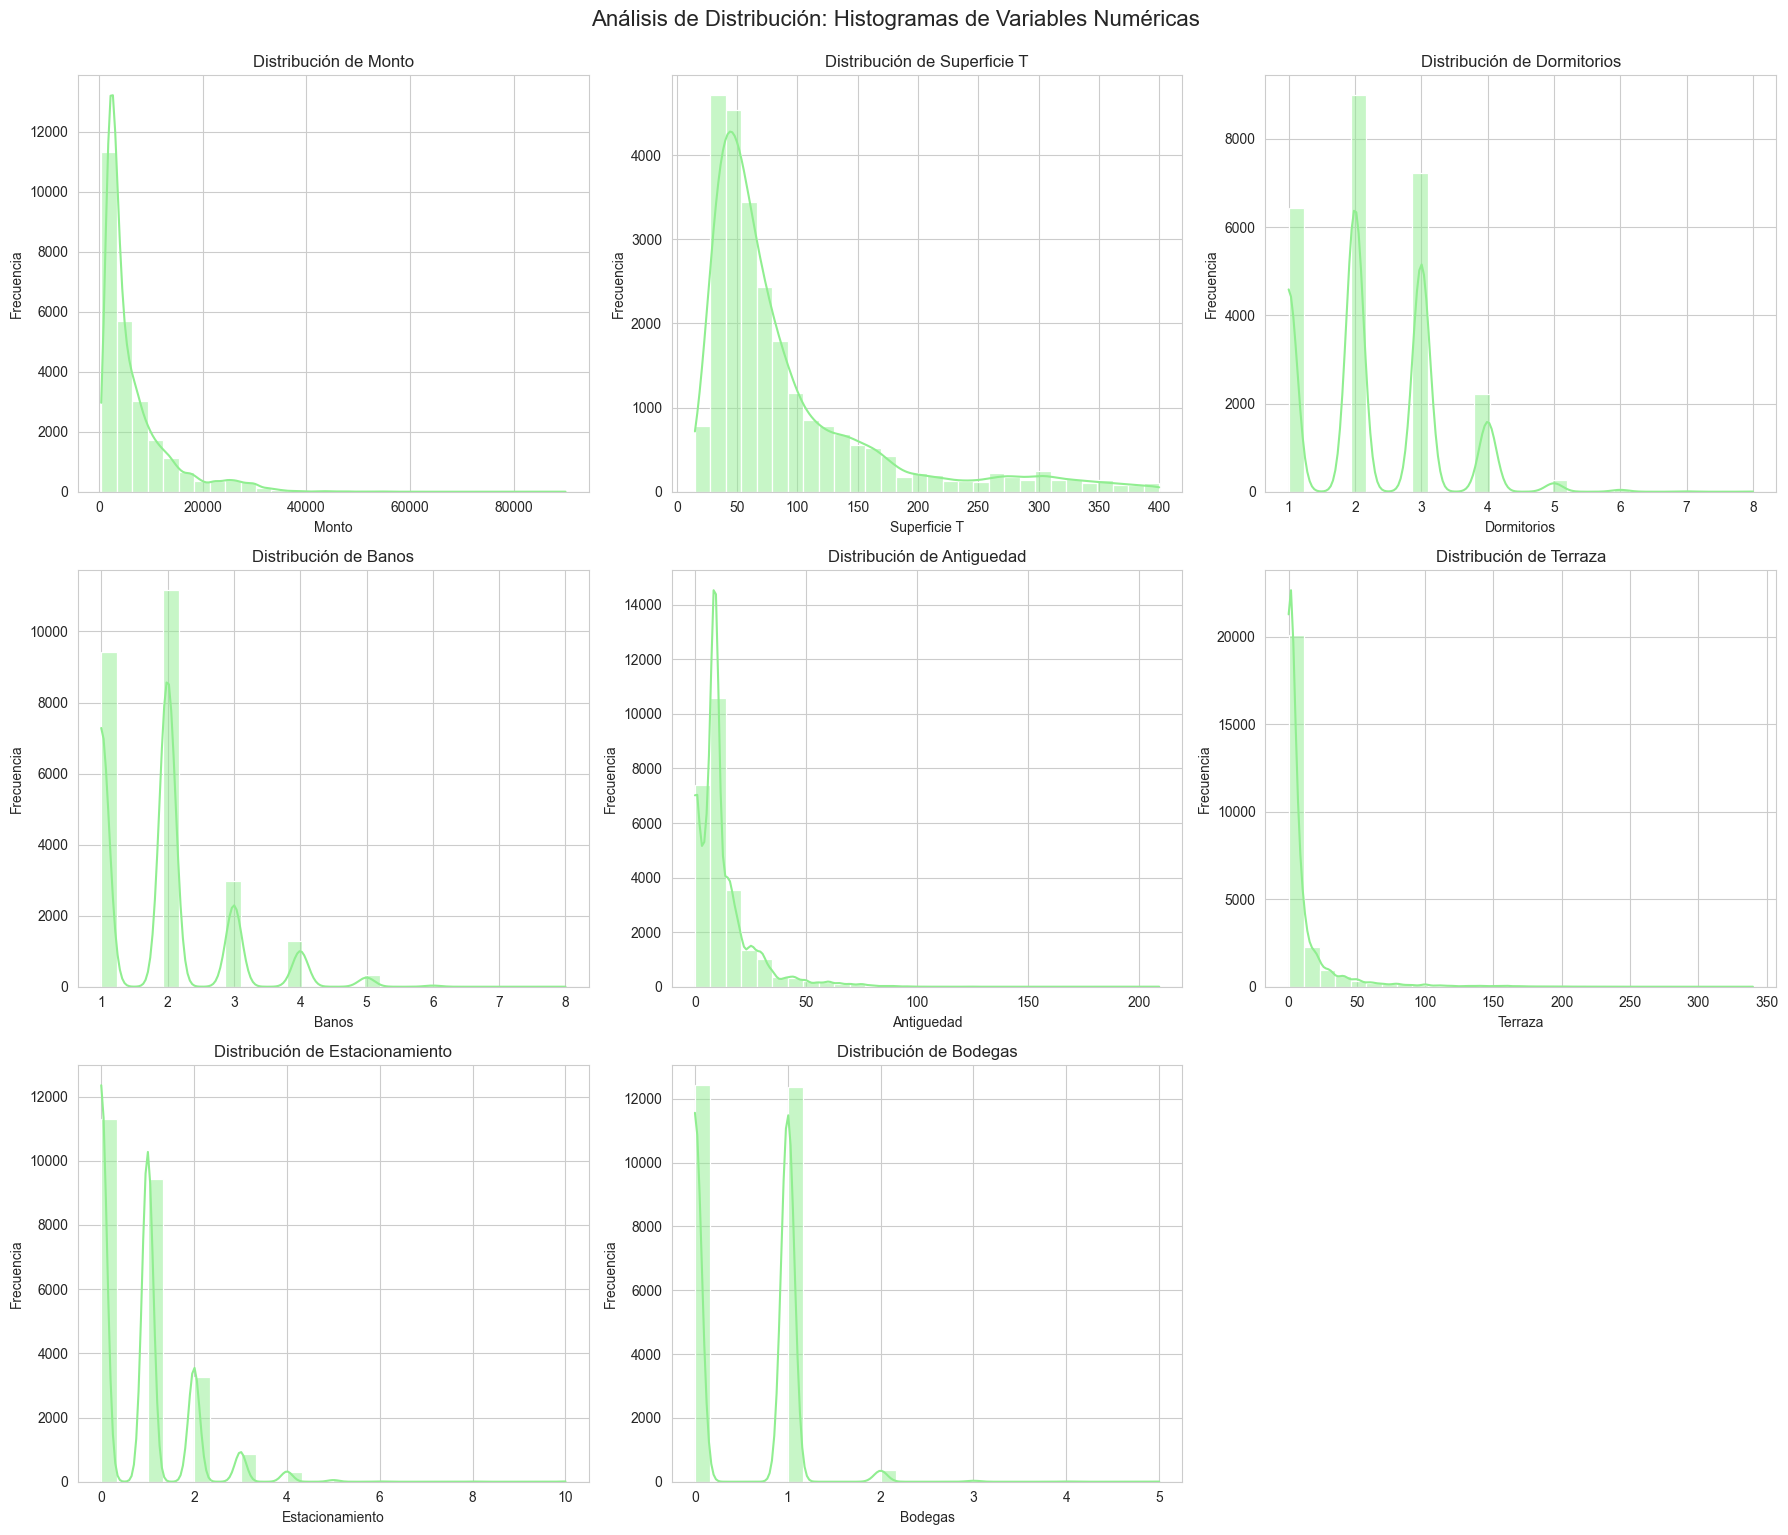

In [81]:
# Variables numéricas clave a visualizar
numeric_cols = ['monto', 'superficie_t', 'dormitorios', 'banos', 'antiguedad', 'terraza', 'estacionamiento', 'bodegas']

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y un conjunto de subplots para los histogramas
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula las filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5)) # Ajusta el tamaño de la figura
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

# Generar histplots para cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df3, x=col, kde=True, ax=axes[i], color='lightgreen', bins=30)
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frecuencia')

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.suptitle('Análisis de Distribución: Histogramas de Variables Numéricas', y=1.02, fontsize=16) # Título general
plt.show()

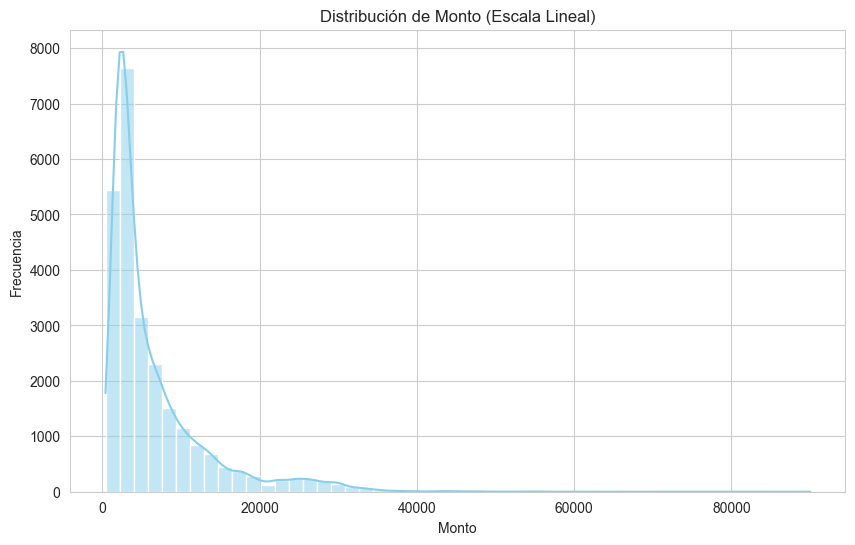

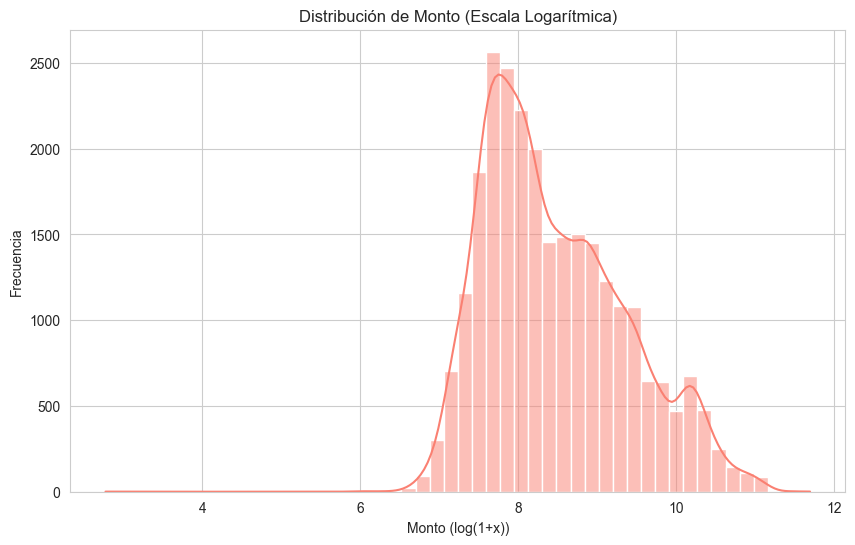

In [82]:
# Histograma de Monto (Escala Lineal)
plt.figure(figsize=(10, 6))
sns.histplot(data=df3, x='monto', kde=True, color='skyblue', bins=50)
plt.title('Distribución de Monto (Escala Lineal)')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain', axis='x') # Evita notación científica en el eje X para monto
plt.show()

# Histograma de Monto (Escala Logarítmica)
plt.figure(figsize=(10, 6))
# Usamos np.log1p (log(1+x)) para manejar valores de 0 si los hubiera, aunque para monto no es común.
# Si todos los montos son positivos, np.log(df['monto']) también funcionaría.
sns.histplot(data=df3, x=np.log1p(df['monto']), kde=True, color='salmon', bins=50)
plt.title('Distribución de Monto (Escala Logarítmica)')
plt.xlabel('Monto (log(1+x))')
plt.ylabel('Frecuencia')
plt.show()

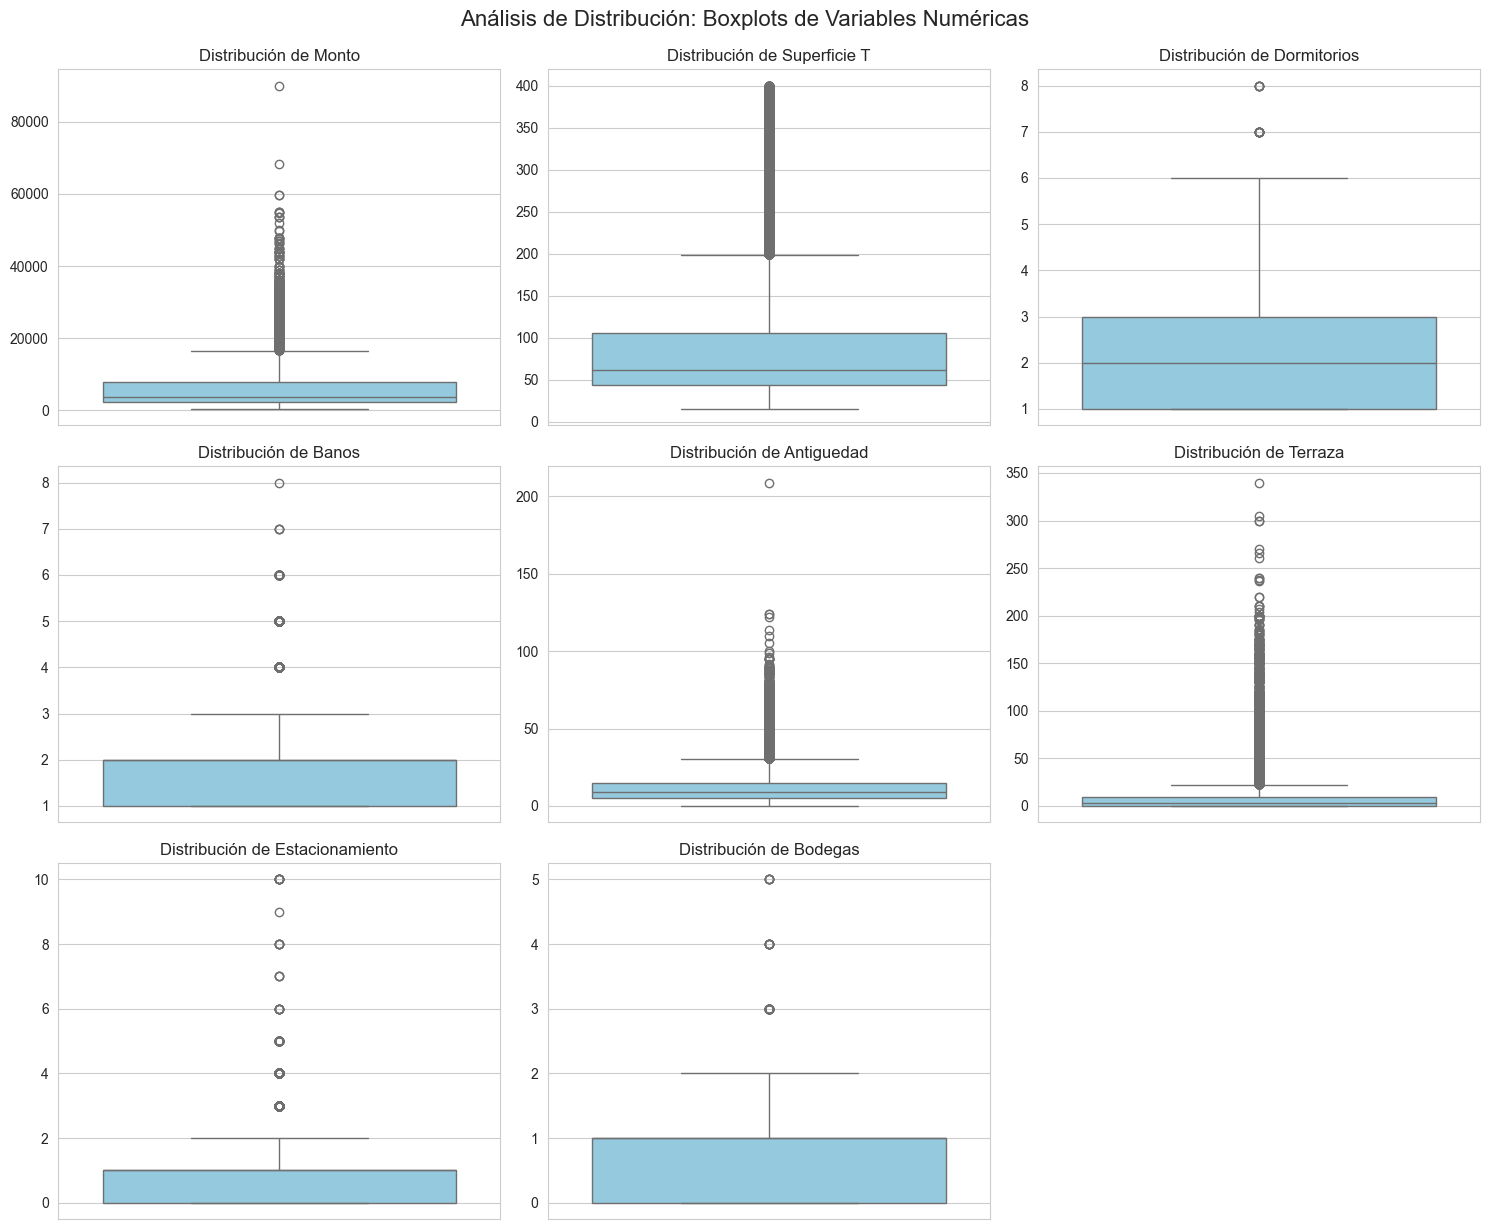

In [83]:
# Variables numéricas clave a visualizar
numeric_cols = ['monto', 'superficie_t', 'dormitorios', 'banos', 'antiguedad', 'terraza', 'estacionamiento', 'bodegas']

# Configuración del estilo de los gráficos
sns.set_style("whitegrid")

# Crear una figura y un conjunto de subplots
# Calculamos el número de filas y columnas necesarias.
# Por ejemplo, 3 columnas por fila parece una buena distribución.
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calcula las filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4)) # Ajusta el tamaño de la figura
axes = axes.flatten() # Aplanar el array de axes para fácil iteración

# Generar boxplots para cada variable numérica
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df3[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col.replace("_", " ").title()}', fontsize=12)
    axes[i].set_ylabel('') # Eliminar la etiqueta del eje y para evitar redundancia

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajustar el diseño para evitar superposiciones
plt.suptitle('Análisis de Distribución: Boxplots de Variables Numéricas', y=1.02, fontsize=16) # Título general
plt.show()


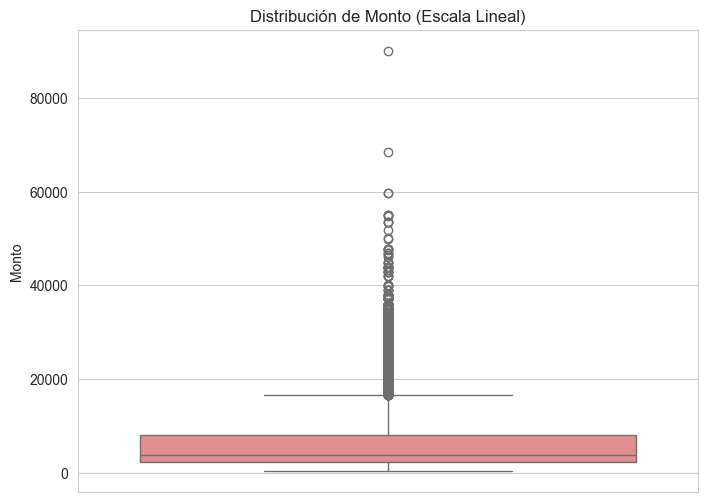

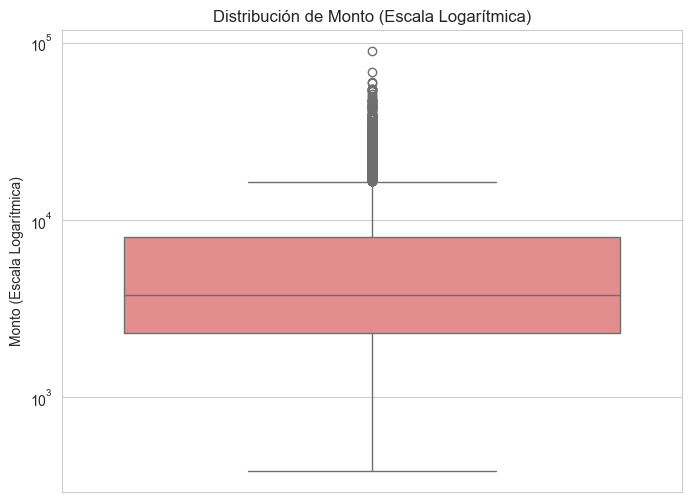

In [84]:
# --- Boxplot para Monto individualmente con escala logarítmica (opcional) ---
# Dada la alta variabilidad esperada en 'monto', un boxplot con escala logarítmica
# puede ser más informativo para visualizar su distribución y outliers.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df3['monto'], color='lightcoral')
plt.title('Distribución de Monto (Escala Lineal)')
plt.ylabel('Monto')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=df3['monto'].apply(lambda x: x if x > 0 else 1), color='lightcoral') # Evitar log(0)
plt.yscale('log')
plt.title('Distribución de Monto (Escala Logarítmica)')
plt.ylabel('Monto (Escala Logarítmica)')
plt.show()

### Modelos de prueba


Comenzando el entrenamiento del modelo...
Epoch 1/50
570/570 [==============================] - 5s 5ms/step - loss: 0.2809 - root_mean_squared_error: 0.5300 - val_loss: 0.0710 - val_root_mean_squared_error: 0.2664
Epoch 2/50
570/570 [==============================] - 3s 4ms/step - loss: 0.0567 - root_mean_squared_error: 0.2380 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2315
Epoch 3/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0628 - root_mean_squared_error: 0.2507 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2316
Epoch 4/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0557 - root_mean_squared_error: 0.2360 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2875
Epoch 5/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0567 - root_mean_squared_error: 0.2382 - val_loss: 0.1631 - val_root_mean_squared_error: 0.4039
Epoch 6/50
570/570 [==============================] - 2s 4ms/step - loss: 0.0607 - root_mean_squa

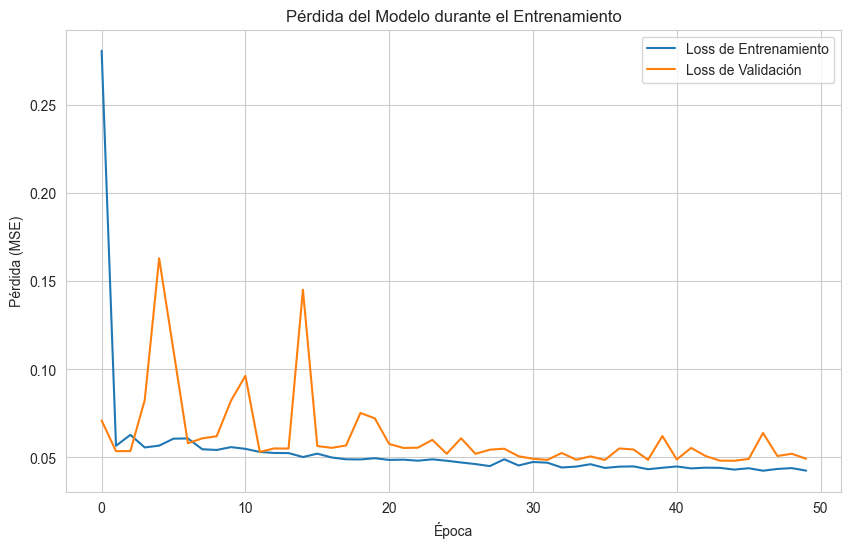

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

# --- 1. Preparación de Datos (asegúrate de que df_para_modelo esté listo) ---
# df_para_modelo debe ser tu DataFrame con 25302 datos y la columna 'superficie_t' ya filtrada a <= 400m².

# Identificación de variables
target = 'monto'
# Excluimos 'id' y 'calle' por no ser útiles directamente para el modelo en este formato
# Las flags _faltante ya deberían estar en 0 o 1
# Las columnas Or_N, Or_S, Or_E, Or_O, Or_Faltante son flags de orientación, se mantendrán
numerical_features = ['superficie_t', 'dormitorios', 'banos', 'antiguedad',
                      'terraza', 'estacionamiento', 'bodegas',
                      'dormitorios_faltante', 'banos_faltante', 'antiguedad_faltante']

categorical_features = ['comuna'] # 'comuna' es la única categórica que queda explícita

# Separar características (X) y objetivo (y)
X = df_para_modelo.drop(columns=[target, 'id', 'calle'])
y = df_para_modelo[target]

# Opcional: Aplicar transformación logarítmica al monto si la asimetría es un problema
# Esto es muy recomendable para montos, como hemos discutido
y = np.log1p(y) # Usamos log1p para manejar ceros si los hubiera, y para suavizar la distribución

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Escalar numéricas y One-Hot Encode categóricas
# Usa ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantener columnas no especificadas (flags, etc.)
)

# Crear un Pipeline para aplicar el preprocesamiento
# El pipeline también nos da una X_train y X_test ya transformadas
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 2. Construcción del Modelo de Red Neuronal ---

model = Sequential([
    # Capa de entrada (número de neuronas = número de características después del preprocesamiento)
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(64, activation='relu'),
    # Capa de salida: 1 neurona para la predicción de monto (regresión lineal)
    # Sin función de activación para una salida lineal, adecuada para problemas de regresión
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), # Adam es un optimizador robusto
              loss=MeanSquaredError(),              # MSE para regresión
              metrics=[RootMeanSquaredError()])     # RMSE es más interpretable que MSE

# --- 3. Entrenamiento del Modelo ---
print("\nComenzando el entrenamiento del modelo...")
history = model.fit(
    X_train_processed, y_train,
    epochs=50,       # Número de pasadas sobre el dataset
    batch_size=32,   # Número de muestras por actualización de gradiente
    validation_split=0.1, # Usar 10% del conjunto de entrenamiento para validación
    verbose=1        # Muestra el progreso del entrenamiento
)
print("Entrenamiento completado.")

# --- 4. Evaluación del Modelo ---
print("\nEvaluando el modelo en el conjunto de prueba...")
loss, rmse = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Pérdida (MSE) en el conjunto de prueba: {loss:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) en el conjunto de prueba: {rmse:.4f}")

# Si aplicamos logaritmo al monto, el RMSE está en la escala logarítmica.
# Para interpretar en la escala original, debemos aplicar np.expm1 (exp(x) - 1)
print(f"RMSE en la escala original (aproximado): {np.expm1(rmse):.2f}")

# --- 5. Visualización del Historial de Entrenamiento (Opcional) ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

# --- 6. Predicciones (Ejemplo) ---
# Puedes hacer predicciones en datos nuevos (X_new_processed)
# predictions_log = model.predict(X_new_processed)
# predictions_original_scale = np.expm1(predictions_log)


Comenzando el entrenamiento del modelo...
Epoch 1/50
568/568 [==============================] - 3s 5ms/step - loss: 0.4087 - root_mean_squared_error: 0.6393 - val_loss: 0.0539 - val_root_mean_squared_error: 0.2321
Epoch 2/50
568/568 [==============================] - 2s 4ms/step - loss: 0.0620 - root_mean_squared_error: 0.2489 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2279
Epoch 3/50
568/568 [==============================] - 2s 4ms/step - loss: 0.0611 - root_mean_squared_error: 0.2473 - val_loss: 0.2422 - val_root_mean_squared_error: 0.4922
Epoch 4/50
568/568 [==============================] - 2s 4ms/step - loss: 0.0640 - root_mean_squared_error: 0.2529 - val_loss: 0.0930 - val_root_mean_squared_error: 0.3049
Epoch 5/50
568/568 [==============================] - 2s 4ms/step - loss: 0.0671 - root_mean_squared_error: 0.2590 - val_loss: 0.0510 - val_root_mean_squared_error: 0.2259
Epoch 6/50
568/568 [==============================] - 2s 4ms/step - loss: 0.0587 - root_mean_squa

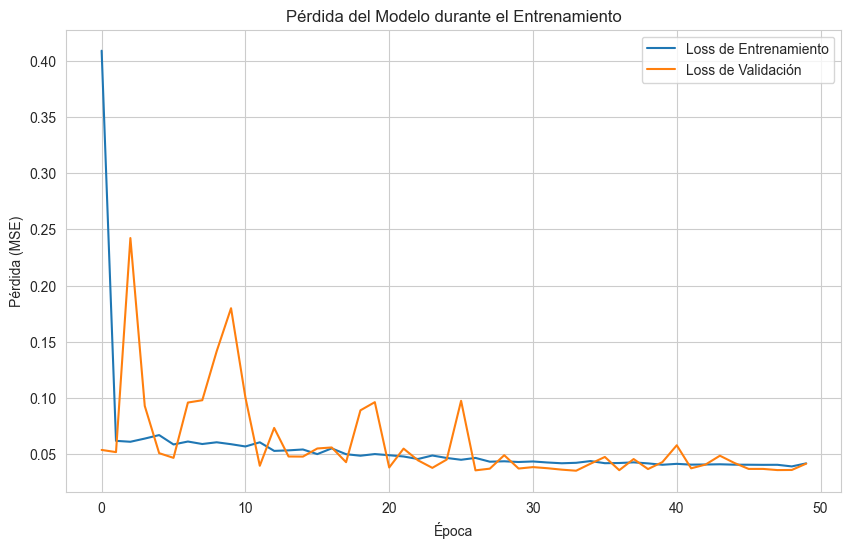

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError



# Identificación de variables
target = 'monto'
# Excluimos 'id' y 'calle' por no ser útiles directamente para el modelo en este formato
# Las flags _faltante ya deberían estar en 0 o 1
# Las columnas Or_N, Or_S, Or_E, Or_O, Or_Faltante son flags de orientación, se mantendrán
numerical_features = ['superficie_t', 'dormitorios', 'banos', 'antiguedad',
                      'terraza', 'estacionamiento', 'bodegas',
                      'dormitorios_faltante', 'banos_faltante', 'antiguedad_faltante']

categorical_features = ['comuna'] # 'comuna' es la única categórica que queda explícita

# Separar características (X) y objetivo (y)
X = df3.drop(columns=[target, 'id', 'calle'])
y = df3[target]

# Opcional: Aplicar transformación logarítmica al monto si la asimetría es un problema
# Esto es muy recomendable para montos, como hemos discutido
y = np.log1p(y) # Usamos log1p para manejar ceros si los hubiera, y para suavizar la distribución

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento: Escalar numéricas y One-Hot Encode categóricas
# Usa ColumnTransformer para aplicar diferentes transformaciones a diferentes columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantener columnas no especificadas (flags, etc.)
)

# Crear un Pipeline para aplicar el preprocesamiento
# El pipeline también nos da una X_train y X_test ya transformadas
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# --- 2. Construcción del Modelo de Red Neuronal ---

model = Sequential([
    # Capa de entrada (número de neuronas = número de características después del preprocesamiento)
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(64, activation='relu'),
    # Capa de salida: 1 neurona para la predicción de monto (regresión lineal)
    # Sin función de activación para una salida lineal, adecuada para problemas de regresión
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), # Adam es un optimizador robusto
              loss=MeanSquaredError(),              # MSE para regresión
              metrics=[RootMeanSquaredError()])     # RMSE es más interpretable que MSE

# --- 3. Entrenamiento del Modelo ---
print("\nComenzando el entrenamiento del modelo...")
history = model.fit(
    X_train_processed, y_train,
    epochs=50,       # Número de pasadas sobre el dataset
    batch_size=32,   # Número de muestras por actualización de gradiente
    validation_split=0.1, # Usar 10% del conjunto de entrenamiento para validación
    verbose=1        # Muestra el progreso del entrenamiento
)
print("Entrenamiento completado.")

# --- 4. Evaluación del Modelo ---
print("\nEvaluando el modelo en el conjunto de prueba...")
loss, rmse = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Pérdida (MSE) en el conjunto de prueba: {loss:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE) en el conjunto de prueba: {rmse:.4f}")

# Si aplicamos logaritmo al monto, el RMSE está en la escala logarítmica.
# Para interpretar en la escala original, debemos aplicar np.expm1 (exp(x) - 1)
print(f"RMSE en la escala original (aproximado): {np.expm1(rmse):.2f}")

# --- 5. Visualización del Historial de Entrenamiento (Opcional) ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss de Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss de Validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.show()

# --- 6. Predicciones (Ejemplo) ---
# Puedes hacer predicciones en datos nuevos (X_new_processed)
# predictions_log = model.predict(X_new_processed)
# predictions_original_scale = np.expm1(predictions_log)

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25215 entries, 0 to 26188
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    25215 non-null  int64  
 1   monto                 25215 non-null  int64  
 2   superficie_t          25215 non-null  float64
 3   dormitorios           25215 non-null  int64  
 4   dormitorios_faltante  25215 non-null  int64  
 5   banos                 25215 non-null  int64  
 6   banos_faltante        25215 non-null  int64  
 7   antiguedad            25215 non-null  int64  
 8   antiguedad_faltante   25215 non-null  int64  
 9   Or_N                  25215 non-null  int64  
 10  Or_S                  25215 non-null  int64  
 11  Or_E                  25215 non-null  int64  
 12  Or_O                  25215 non-null  int64  
 13  Or_Faltante           25215 non-null  int64  
 14  terraza               25215 non-null  float64
 15  estacionamiento       25

In [88]:
df3.describe()

,id,monto,superficie_t,dormitorios,dormitorios_faltante,banos,banos_faltante,antiguedad,antiguedad_faltante,Or_N,Or_S,Or_E,Or_O,Or_Faltante,terraza,estacionamiento,bodegas,flag_Departamento,flag_Multinivel,flag_Semipiso,flag_Premium,flag_Monoambiente,flag_Loft,latitud,longitud
count,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00,25215.00
mean,2248748267.33,6457.22,90.19,2.25,0.03,1.89,0.09,12.17,0.22,0.23,0.22,0.15,0.33,0.35,9.94,0.80,0.53,0.92,0.01,0.04,0.01,0.01,0.01,-33.44,-70.62
std,627646572.31,6611.55,74.76,0.99,0.16,0.91,0.28,12.62,0.41,0.42,0.41,0.36,0.47,0.48,22.00,0.92,0.54,0.28,0.12,0.20,0.10,0.10,0.08,0.04,0.05
min,1359204515.00,384.00,15.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-33.65,-70.83
25%,1580853221.00,2300.00,43.00,1.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.46,-70.65
50%,2753156674.00,3800.00,62.00,2.00,0.00,2.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.44,-70.63
75%,2850987746.00,7980.00,105.00,3.00,0.00,2.00,0.00,15.00,0.00,0.00,0.00,0.00,1.00,1.00,9.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-33.42,-70.58
max,2864912270.00,90000.00,400.00,8.00,1.00,8.00,1.00,209.00,1.00,1.00,1.00,1.00,1.00,1.00,340.00,10.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,-33.28,-70.49


In [86]:
df3.to_csv('Datasets\dataset_final.csv', index=False)